In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from agglio_lib import *

In [ ]:
#num_list = [1000, 2000, 5000, 10000, 15000, 20000]
num_list = [1000, 2000, 5000, 10000, 20000, 50000, 100000]
sigma_list = [0.05, .1, .5, 1]
d = 50
w_radius = 10
w0 =w_radius*np.random.randn(d,1)/np.sqrt(d)
wAst = np.random.randn(d,1)
params={}
params['algo']='AG_GD'
params['w0']=w0
params['wAst']=wAst
err_list_AG_GD = [[] for s in sigma_list]
for i,s in enumerate(sigma_list):
  print('sigma=',s)
  for n in num_list:
    X = getData(0, 1, n, d)/np.sqrt(d)
    ipAst = np.matmul(X, wAst)
    y = sigmoid_noisy_pre(ipAst,sigma_noise=s)  #0.05
    objVals_agd,distVals_agd,time_agd = cross_validate(X,y,params,cross_validation=True)
    err_list_AG_GD[i].append(distVals_agd[-1])

sigma= 0.05
The best parameters are {'B_init': 0.0001, 'B_step': 1.01, 'alpha': 50.75} with a score of -0.00
The best parameters are {'B_init': 0.0001, 'B_step': 1.01, 'alpha': 50.75} with a score of -0.00
The best parameters are {'B_init': 0.0001, 'B_step': 1.01, 'alpha': 50.75} with a score of -0.00
The best parameters are {'B_init': 0.0001, 'B_step': 1.1325, 'alpha': 50.75} with a score of -0.00
The best parameters are {'B_init': 0.0001, 'B_step': 1.01, 'alpha': 150.25} with a score of -0.00
The best parameters are {'B_init': 0.0001, 'B_step': 1.01, 'alpha': 100.5} with a score of -0.00
The best parameters are {'B_init': 0.0001, 'B_step': 1.255, 'alpha': 50.75} with a score of -0.00
sigma= 0.1
The best parameters are {'B_init': 0.0001, 'B_step': 1.01, 'alpha': 150.25} with a score of -0.00
The best parameters are {'B_init': 0.1, 'B_step': 1.5, 'alpha': 50.75} with a score of -0.00
The best parameters are {'B_init': 0.0001, 'B_step': 1.01, 'alpha': 50.75} with a score of -0.00
The be

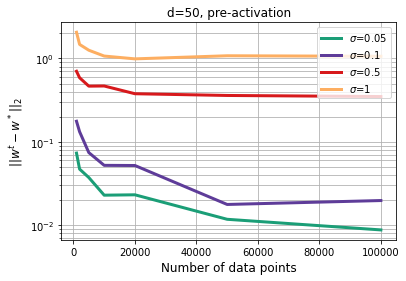

In [ ]:
import matplotlib.pyplot as plt

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42


plt.plot(num_list, err_list_AG_GD[0], label=r'$\sigma$='+str(sigma_list[0]), color='#1b9e77', linewidth=3)
plt.plot(num_list, err_list_AG_GD[1], label=r'$\sigma$='+str(sigma_list[1]),  color='#5e3c99', linewidth=3)
plt.plot(num_list, err_list_AG_GD[2], label=r'$\sigma$='+str(sigma_list[2]),  color='#d7191c', linewidth=3)
plt.plot(num_list, err_list_AG_GD[3],  label=r'$\sigma$='+str(sigma_list[3]), color='#fdae61',  linewidth=3)


plt.legend(loc='upper right')
plt.grid(which='both', axis='both')
plt.yscale('log')
plt.title(f'd={d}, pre-activation')
plt.xlabel('Number of data points', fontsize=12)
plt.ylabel("$||w^t-w^*||_2$",fontsize=12)

# plt.xscale('log')
plt.savefig('pre_activation_sigmoid_consistency.pdf',dpi=300)
plt.show()

In [ ]:
import pickle

take_dump=True
#take_dump=True

if take_dump:
    with open('pre_activation_sigmoid_consistency.pkl','wb') as f:
      pickle.dump([num_list, sigma_list, err_list_AG_GD], f, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
import pickle
with open('pre_activation_sigmoid_consistency.pkl','rb') as f:
   [num_list, sigma_list, err_list_AG_GD, err_list_AG_GD_Fixed]= pickle.load(f)

d=50